# Python and Pytorch basics

## overview of today's lecture 
    1. Tensor basics: 
        - Create, Operations, Numpy
    2. Autograd: 
        - Linear regression example
    3. Training loop:
        - Model, Loss, Optimizer and Scheduler
    4. Nueral network: 
        - Datasets, DataLoader, GPU (optional)

## 1. Tensors 

### Definition: 
A multidimenisonal matrix containing a single data type. 

Tensors are simply mathematical objects that can be used to describe <font color='red'> physical properties </font>, just like scalars and vectors. In fact tensors are merely a generalisation of scalars and vectors; a scalar is a zero rank tensor, and a vector is a first rank tensor. 

### Example - Hook's law in 3D: 
$$\sigma_{ij} = C_{ijkl}\epsilon_{kl}$$ 
    - $\sigma, \epsilon \in \mathbb{R}^{3 \times 3} $ are <font color='red'>second</font> order tensors.  
    - $ C \in \mathbb{R}^{3 \times 3 \times 3 \times 3}$ is a <font color='red'>fourth</font> order tensor.  

## Pytorch Tensors
Everything in Pytorch is based on tensors.  

#### Use <font color='red'>torch.tensor()</font> to generate tensors with known entries. 

In [5]:
import torch # This is the first line you should write in your Pytorch script 
import numpy as np

# Create Pytorch tensor for scalar 1
a = torch.tensor([1.]) 
print("a = ", a)

# Create pytorch tensor for vector [1,-0.5]
b = torch.tensor([1.0,-0.5])
print("b = ", b) 

# Create Pytorch tensor for matrix [1,-0.5,-0.5,1]
c = torch.tensor([[1.,-0.5],[-0.5,1.]])
print("c = ", c) 

a =  tensor([1.])
b =  tensor([ 1.0000, -0.5000])
c =  tensor([[ 1.0000, -0.5000],
        [-0.5000,  1.0000]])


### Use <font color='red'>torch.rand()</font> to generate tensors with random entries between (0,1)


In [6]:
# We can also generate random numbers  
x = torch.rand(2,2,3) # tensor, 3 dimensional
print (x) 

y = torch.rand(2,3,4,5) # tensor, 4 dimensional
print(y) 

tensor([[[0.7913, 0.7350, 0.9327],
         [0.1761, 0.2087, 0.2875]],

        [[0.1621, 0.9789, 0.2977],
         [0.3454, 0.4113, 0.2060]]])
tensor([[[[0.1988, 0.0920, 0.9119, 0.0860, 0.4351],
          [0.2132, 0.3126, 0.1191, 0.3610, 0.6966],
          [0.0094, 0.3515, 0.6288, 0.8396, 0.1840],
          [0.7372, 0.8887, 0.8819, 0.3405, 0.3063]],

         [[0.5245, 0.7159, 0.2318, 0.4638, 0.1878],
          [0.2462, 0.6599, 0.6996, 0.4755, 0.4239],
          [0.6806, 0.7329, 0.4806, 0.6466, 0.8078],
          [0.8125, 0.8436, 0.6655, 0.8566, 0.0347]],

         [[0.9555, 0.1421, 0.2521, 0.1329, 0.2170],
          [0.0713, 0.3206, 0.6468, 0.7433, 0.4227],
          [0.2992, 0.1061, 0.3392, 0.8464, 0.3157],
          [0.4253, 0.7583, 0.4829, 0.1647, 0.1951]]],


        [[[0.9180, 0.7889, 0.3069, 0.0236, 0.9678],
          [0.9738, 0.2815, 0.4763, 0.6787, 0.8024],
          [0.6597, 0.7032, 0.4582, 0.6782, 0.2703],
          [0.2403, 0.5908, 0.0903, 0.8208, 0.0578]],

         [[0.7

#### We can use <font color='red'>torch.ones()</font> to generate constant tensor

In [7]:
# Constant second order tensor of 1
x = torch.ones(2,2)
print(x)

# Constant third order tensor of 1.5
x = torch.ones(2,2,2)*1.5
print(x)

tensor([[1., 1.],
        [1., 1.]])
tensor([[[1.5000, 1.5000],
         [1.5000, 1.5000]],

        [[1.5000, 1.5000],
         [1.5000, 1.5000]]])


#### Slicing of tensor entries is similar to numpy

In [8]:
x = torch.rand(3,3)
print(x)
# To access the first row
a = x[0,:]
print(a)
# To access the first column
b = x[:,0]
print(b)

tensor([[0.2782, 0.6395, 0.1656],
        [0.4462, 0.1351, 0.9827],
        [0.3060, 0.7872, 0.2913]])
tensor([0.2782, 0.6395, 0.1656])
tensor([0.2782, 0.4462, 0.3060])


#### Check size of tensors with <font color='red'>tensor.shape</font>

In [9]:
a = torch.rand(3,4)
print(a.shape)
# You can also specify the dimension of the tensor that you wish to query
print(a.shape[0])

torch.Size([3, 4])
3


#### Check tensor type with <font color='red'>tensor.dtype</font> - default float32 (single precision)

In [10]:
a = torch.rand(3,4)
print(a.dtype)
b = torch.tensor([0,1])  
print(b.dtype)
c = torch.tensor([0.,1.])  
print(c.dtype)
d = torch.tensor([0,1], dtype=torch.float64)
print(d.dtype)

d = c.double()# this changes the data type to double precision
print(d.dtype)

torch.float32
torch.int64
torch.float32
torch.float64
torch.float64


#### Reshape tensors with <font color='red'>torch.view()</font>

In [38]:
a = torch.ones(2,2)
# Reshape a 2x2 matrix into a 4x1 vector
b = a.view(4,1) 
print(b) 
print(b.shape) 
# You can put -1 in one dimension, to force Pytorch to infer from the rest dimensions
c = a.view(-1,2)
d = a.view(-1,4)

print(c.shape)
print(d.shape)

tensor([[1.],
        [1.],
        [1.],
        [1.]])
torch.Size([4, 1])
torch.Size([2, 2])
torch.Size([1, 4])


## Tensor Linear Algebra 
#### Adding two tensors <font color='red'>torch.add()</font> or simply <font color='red'>+</font>


In [12]:
a = torch.rand(2,2)
b = torch.ones(2,2)

c = a+b 
print(c)
d = torch.add(a,b)
print(d)


tensor([[1.1797, 1.9874],
        [1.9015, 1.0746]])
tensor([[1.1797, 1.9874],
        [1.9015, 1.0746]])


### Similarly Substraction <font color='red'>"-"</font> Multiplication <font color='red'>"*"</font> Division <font color='red'>"/"</font>

These are all element wise, i.e. not matrix multiplication.

In [13]:
a = torch.ones(2,2)
b = torch.ones(2,2)+1

print("a-b = ", a-b)
print("a*b", a*b)
print("a/b", a/b)  # Note this is element wise division! 

a-b =  tensor([[-1., -1.],
        [-1., -1.]])
a*b tensor([[2., 2.],
        [2., 2.]])
a/b tensor([[0.5000, 0.5000],
        [0.5000, 0.5000]])


#### Converting torch.tensor to Numpy array and vice versa 

In [14]:
# this is important for exmaple in visualization - Matplotlib does not accept tensor type
a = torch.ones(2,2)
b = a.numpy()
print(b) 
print(type(b))  

[[1. 1.]
 [1. 1.]]
<class 'numpy.ndarray'>


In [15]:
# To do the inverse, just put torch.tensor(nparray)
a = np.eye(3)
b = torch.tensor(a)
print(a)
print(b)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]], dtype=torch.float64)


## Autograd 
### Finding function derivatives 
Autograd is a key enabler of Pytorch. The package uses automatic differentiation for all operations on Tensors. Generally speaking,<font color='red'>"torch.autograd"</font> is an engine for computing the vector-Jacobian product. It computes partial derivates while applying the chain rule. 

Let us consider the function 
$$y = 2x + 1\quad for \  x \in [0,1]$$
Then
$$\frac{dy}{dx} = 2 $$

Let us now use <font color='red'>"torch.autograd"</font> to find this. 

In [ ]:
import matplotlib.pyplot as plt 
# requires_grad = True -> tracks all operations on the tensor. 
x = torch.linspace(0,1,10,requires_grad=True)
y = 2*x + 1
dydx = torch.autograd.grad(y, x, grad_outputs=torch.ones_like(y),create_graph=True)[0]  
plt.plot(x.detach().numpy(),y.detach().numpy()) # You need to detach the tensor first and convert it to numpy for plotting
plt.plot(x.detach().numpy(),dydx.detach().numpy())
plt.show()

Now suppose we further define
$$z = y^2 $$
and 
$$\frac{dz}{dx} = \frac{dz}{dy} \frac{dy}{dx} =2y \cdot 2 = 8x+4$$

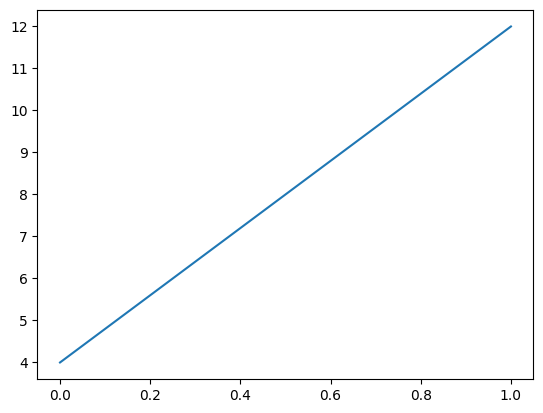

In [19]:
x = torch.linspace(0,1,10,requires_grad=True)
y = 2*x + 1
z = y**2 
dzdx = torch.autograd.grad(z, x, grad_outputs=torch.ones_like(y),create_graph=True)[0]  
plt.plot(x.detach().numpy(),dzdx.detach().numpy())
plt.show()

### Back propagation with <font color='red'>"scalar_tensor.backward()"</font>
A convenient way of computing the derivatives of a <font color='red'>scalar</font> function with respect to inputs. Commonly used to compute the back propagation of Loss functions. Note here Loss function is a scalar function by default. 



In [20]:
# Let's compute the gradients with backpropagation
# When we finish our computation we can call .backward() and have all the gradients computed automatically.
# The gradient for this tensor will be accumulated into .grad attribute.
# It is the partial derivate of the scalar function w.r.t. the input tensor

x = torch.tensor([0., 0.5, 1],requires_grad=True)
y = x + 2 
z = torch.sum(y) # z a scalar function

print(x.grad)
z.backward() 
print(x.grad) # dz/dx  


None
tensor([1., 1., 1.])


### <font color='red'>Note: backward() accumulates the gradient for this tensor into .grad attribute </font> 
### <font color='red'>Use optimizer.zero_grad() to clear the gradient in optimization! </font> 

#### Stop a tensor from tracking history:
For example during the training loop when we want to update our weights, or after training during evaluation. These operations should not be part of the gradient computation. To prevent this, we can use:

- `x.requires_grad_(False)`
- `x.detach()`
- wrap in `with torch.no_grad():`

In [21]:
# .requires_grad_(...) changes an existing flag in-place.
a = torch.randn(2, 2)
b = (a * a).sum()
print(a.requires_grad)
print(b.requires_grad) 

False
False


In [22]:
a.requires_grad_(True)
b = (a * a).sum()
print(a.requires_grad)
print(b.requires_grad)

True
True


In [23]:
# .detach(): get a new Tensor with the same content but no gradient computation:
a = torch.randn(2, 2, requires_grad=True)
b = a.detach()
print(a.requires_grad)
print(b.requires_grad)

True
False


In [24]:
# wrap in 'with torch.no_grad():'
a = torch.randn(2, 2, requires_grad=True)
print(a.requires_grad)
with torch.no_grad():
    b = a ** 2
    print(b.requires_grad)

True
False


### Gradient Descent Method
Linear Regression example with mean squared loss function:

$f(x) = w * x + b$

here  $$\hat{f}(x) = 2*x$$

$$loss(f,\hat{f}) = \frac{1}{N_x} \sum_{k=0}^{N_x}(f(x_k) - \hat{f}(x_k))^2 $$

In [25]:
# Define the prediction model class
def forward(x): 
    return w * x

# Define the loss function
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

In [26]:
X = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8, 10, 12, 14, 16], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True) 

X_test = 5.0

print(f'Prediction before training: f({X_test}) = {forward(X_test).item():.3f}')

Prediction before training: f(5.0) = 0.000


In [27]:
# Training
learning_rate = 0.01 # Important hyper parameter! 
n_epochs = 100

for epoch in range(n_epochs):
    # predict = forward pass
    y_pred = forward(X)

    # loss
    l = loss(Y, y_pred)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    #w.data = w.data - learning_rate * w.grad
    with torch.no_grad():
      w -= learning_rate * w.grad
    
    # zero the gradients after updating
    w.grad.zero_()

    if (epoch+1) % 10 == 0:
        print(f'epoch {epoch+1}: w = {w.item():.3f}, loss = {l.item():.3f}')

print(f'Prediction after training: f({X_test}) = {forward(X_test).item():.3f}')

epoch 10: w = 1.998, loss = 0.000
epoch 20: w = 2.000, loss = 0.000
epoch 30: w = 2.000, loss = 0.000
epoch 40: w = 2.000, loss = 0.000
epoch 50: w = 2.000, loss = 0.000
epoch 60: w = 2.000, loss = 0.000
epoch 70: w = 2.000, loss = 0.000
epoch 80: w = 2.000, loss = 0.000
epoch 90: w = 2.000, loss = 0.000
epoch 100: w = 2.000, loss = 0.000
Prediction after training: f(5.0) = 10.000


### 3. Model, Loss & Optimizer

A typical PyTorch pipeline looks like this:

1. Design model (input, output, forward pass with different layers)
2. Specify train and test data 
3. Construct loss and optimizer
4. Training loop:
      - Forward = compute prediction and loss
      - Backward = compute gradients
      - Update weights

In [28]:
import torch
import torch.nn as nn

# Linear regression
# f = w * x 
# here : f = 2 * x

# 1) Design Model, the model has to implement the forward pass!

# Here we could simply use a built-in model from PyTorch
# model = nn.Linear(input_size, output_size)

class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define different layers
        self.lin = nn.Linear(input_dim, output_dim) 

    def forward(self, x):
        return self.lin(x)


In [29]:
# 2) Specify training samples, watch the shape! 
X = torch.tensor([[1], [2], [3], [4], [5], [6], [7], [8]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8], [10], [12], [14], [16]], dtype=torch.float32)

# 2) A general way of specifying train/test data is to reshape the data as N_sample x N_feature1 x N_feature2 ....
n_samples, n_features = X.shape
print(f'n_samples = {n_samples}, n_features = {n_features}')

# 2) create a test sample
X_test = torch.tensor([5], dtype=torch.float32) 

# 2) Initialize model 
input_size, output_size = n_features, n_features

model = LinearRegression(input_size, output_size)

print(f'Prediction before training: f({X_test.item()}) = {model(X_test).item():.3f}')

n_samples = 8, n_features = 1
Prediction before training: f(5.0) = -1.518


#### Select your optimizer with <font color='red'>torch.optim</font>, and be careful with your learning rate 
#### Tune your learning rate during the training with <font color='red'>torch.optim.lr_scheduler</font>

In [30]:
# 3) Define loss and optimizer
learning_rate = 0.01
n_epochs = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1) # Decrease learning rate by 10 every 30 training epochs 

In [31]:
# 4) Training loop
for epoch in range(n_epochs):
    # predict = forward pass with our model
    y_predicted = model(X)

    # loss
    l = loss(Y, y_predicted)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    optimizer.step()

    # zero the gradients after updating
    optimizer.zero_grad()

    # Update learning rate
    scheduler.step()


    if (epoch+1) % 10 == 0:
        w, b = model.parameters() # unpack parameters
        print('epoch ', epoch+1, ': w = ', w[0][0].item(), ' loss = ', l.item())

print(f'Prediction after training: f({X_test.item()}) = {model(X_test).item():.3f}')

epoch  10 : w =  1.7961145639419556  loss =  0.269537091255188
epoch  20 : w =  1.8053462505340576  loss =  0.24862763285636902
epoch  30 : w =  1.812980055809021  loss =  0.2295108586549759
epoch  40 : w =  1.8137253522872925  loss =  0.22605128586292267
epoch  50 : w =  1.8144677877426147  loss =  0.22425320744514465
epoch  60 : w =  1.8152071237564087  loss =  0.22246938943862915
epoch  70 : w =  1.8152810335159302  loss =  0.2221319079399109
epoch  80 : w =  1.8153549432754517  loss =  0.22195449471473694
epoch  90 : w =  1.8154288530349731  loss =  0.22177714109420776
epoch  100 : w =  1.8154360055923462  loss =  0.22174344956874847
Prediction after training: f(5.0) = 10.115


## 4. First Neural Net
Datasets, DataLoader, Neural Net, Training & Evaluation, GPU(optional)

### Datasets: Let us consider the celebrated MNIST data set for ML 

### <font color='red'>Don't forget to normalize your data before training!</font>

100.0%
100.0%
100.0%
100.0%


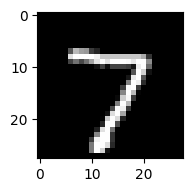

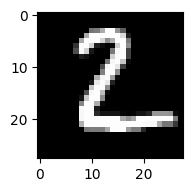

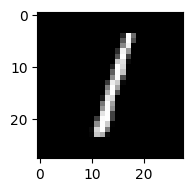

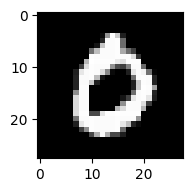

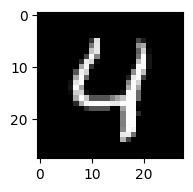

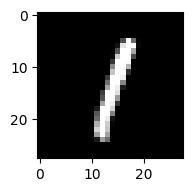

In [33]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration (Optional)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
input_size = 784 # 28x28
output_classes = 10
FCNN_arch = [input_size, 500,output_classes]
non_linearity = nn.ReLU 
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# Loading the MNIST dataset  600 training data, 100 test data
# Generally you need to define this your self
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

examples = iter(test_loader)
example_data, example_targets = next(examples)

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
    plt.show() 



### Design your neural network architecture and choose <font color='red'>  nonlinearity</font>

In [34]:
# Fully connected neural network w
class FCNN(nn.Module):
    def __init__(self, layers, nonlinearity):
        super(FCNN, self).__init__()

        self.n_layers = len(layers) - 1

        assert self.n_layers >= 1

        self.layers = nn.ModuleList()

        for j in range(self.n_layers):
            self.layers.append(nn.Linear(layers[j], layers[j + 1]))

            if j != self.n_layers - 1:
                self.layers.append(nonlinearity())

    def forward(self, x):
        for _, l in enumerate(self.layers):
            x = l(x)

        return x 
    
FCNN_arch = [input_size, 500,output_classes] 
non_linearity = nn.ReLU 
model = FCNN(FCNN_arch, non_linearity).to(device)
print(model)

FCNN(
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=500, bias=True)
    (1): ReLU()
    (2): Linear(in_features=500, out_features=10, bias=True)
  )
)


### Loss and optimizer: this is a classification problem - use cross entropy loss

In [35]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1) # Decrease learning rate by 10 every 30 training epochs 

In [36]:
# Train the model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass and loss calculation
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        scheduler.step()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{600}], Loss: {loss.item():.4f}')
        
    # Test the model: we don't need to compute gradients
    with torch.no_grad():
        n_correct = 0
        n_samples = len(test_loader.dataset)

        for images, labels in test_loader:
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)

            outputs = model(images)

            # max returns (output_value ,index)
            _, predicted = torch.max(outputs, 1)
            n_correct += (predicted == labels).sum().item()

        acc = n_correct / n_samples    
    print ("end epoch", epoch, "Train loss", loss.item(), "Accuracy", acc)

Epoch [1/2], Step [100/600], Loss: 0.4812
Epoch [1/2], Step [200/600], Loss: 0.5066
Epoch [1/2], Step [300/600], Loss: 0.5055
Epoch [1/2], Step [400/600], Loss: 0.5389
Epoch [1/2], Step [500/600], Loss: 0.5917
Epoch [1/2], Step [600/600], Loss: 0.6134
end epoch 0 Train loss 0.6134366393089294 Accuracy 0.877
Epoch [2/2], Step [100/600], Loss: 0.4929
Epoch [2/2], Step [200/600], Loss: 0.6515
Epoch [2/2], Step [300/600], Loss: 0.4687
Epoch [2/2], Step [400/600], Loss: 0.4904
Epoch [2/2], Step [500/600], Loss: 0.5609
Epoch [2/2], Step [600/600], Loss: 0.4474
end epoch 1 Train loss 0.44738391041755676 Accuracy 0.877
